# Multiple Linear Regression Demonstration

This notebook demonstrates how to perform a multiple linear regression on the Diabetes dataset using the scikit-learn library.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## Load and Prepare Dataset

Load the Diabetes dataset and prepare it for multiple linear regression.

In [2]:
# pylint: disable=E1101
# Load the diabetes dataset.
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
# pylint: enable=E1101

## Feature Selection

Compute correlations and select the three most correlated features with the target variable.

In [3]:
# Compute the correlation matrix.
corr_matrix = X.corrwith(pd.Series(y))

# Select the three most correlated features.
top_features = corr_matrix.abs().sort_values(ascending=False).head(3).index
X_top = X[top_features]

## Data Standardization

Standardize the features to have zero mean and unit variance.

In [4]:
# Standardize the features.
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

## Split Data and Train Model

Split the data into training and testing sets, then fit the multiple linear regression model.

In [5]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_top_scaled, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3D Visualization

Create a 3D visualization showing the regression plane and residuals.

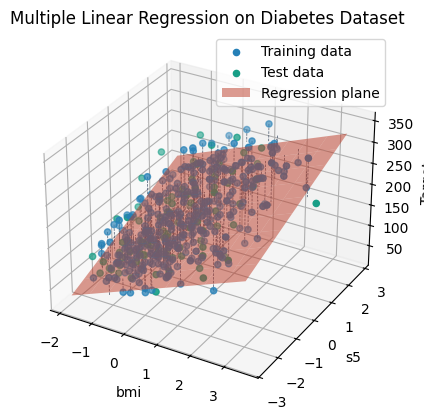

In [6]:
# Plot the regression plane and residuals.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of the actual data points.
ax.scatter(
    X_train[:, 0], X_train[:, 1], y_train,
    color="#2580B7", label="Training data"
)
ax.scatter(
    X_test[:, 0], X_test[:, 1], y_test,
    color="#179E86", label="Test data"
)

# Create a meshgrid for the regression plane.
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 10),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10)
)
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

# Plot the regression plane.
ax.plot_surface(
    x_surf, y_surf, z_surf,
    color="#C03B26", alpha=0.5, label="Regression plane"
)

# Plot residuals.
for x0, y1, y2 in zip(X_train, y_train, y_train_pred):
    ax.plot(
        [x0[0], x0[0]], [x0[1], x0[1]], [y1, y2],
        color="#44546A", linestyle="--", linewidth=0.5
)

ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel("Target")
plt.title("Multiple Linear Regression on Diabetes Dataset")

plt.legend()
plt.show()